In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

In [32]:
df = pd.read_excel("cleaned_data.xlsx")

drop_cols = [
    "state", "Unnamed: 0", "blurb", "name", "created_at", "launched_at",
    "deadline", "state_changed_at", "creator_name", "location_name", "success_probability", "fail_probability"
]
X = df.drop(columns=drop_cols, errors="ignore")
X = X.select_dtypes(include=["float64", "int64", "bool"]).fillna(0)


y1 = df["success_probability"]
mi_success = mutual_info_regression(X, y1, random_state=0)

y2 = df["fail_probability"]
mi_fail = mutual_info_regression(X, y2, random_state=0)

mi_df = pd.DataFrame({
    "Feature": X.columns,
    "MI_Success": mi_success,
    "MI_Fail": mi_fail
}).sort_values(by="MI_Success", ascending=False)

corr = X.corr()

In [33]:
X.corr()

,backers_count,converted_pledged_amount,country,country_displayable_name,currency,current_currency,fx_rate,goal,pledged,spotlight,...,usd_pledged,category_name,category_slug,location_country,location_state,days_diff_created_at_deadline,days_diff_state_changed_at_launched_at,name_len,blurb_len,success_percent
backers_count,1.000000,0.765958,0.019100,0.013632,0.019939,0.000517,-0.005238,0.006076,0.375847,0.124446,...,0.767561,0.016793,-0.022928,0.010694,-0.025966,0.028032,0.002865,0.047468,-0.009150,0.013859
converted_pledged_amount,0.765958,1.000000,0.017402,0.010591,0.018619,-0.000960,-0.003012,0.006346,0.474196,0.088406,...,0.999953,0.008449,-0.004563,0.010113,-0.025514,0.022666,0.012804,0.050530,-0.001655,0.012938
country,0.019100,0.017402,1.000000,0.783511,0.985573,0.007388,-0.057198,-0.011051,-0.021823,0.025085,...,0.017474,-0.027895,-0.020235,0.940898,0.064712,0.027307,-0.020742,-0.002616,0.026463,0.007070
country_displayable_name,0.013632,0.010591,0.783511,1.000000,0.784228,-0.001857,0.372769,-0.016925,-0.060252,0.050333,...,0.010690,-0.038378,-0.004757,0.714915,-0.047781,0.013794,-0.048317,-0.017640,0.030489,0.002950
currency,0.019939,0.018619,0.985573,0.784228,1.000000,0.007101,-0.036677,-0.012942,-0.027103,0.030018,...,0.018682,-0.030304,-0.020550,0.930380,0.054054,0.025845,-0.025785,-0.003085,0.026768,0.007427
current_currency,0.000517,-0.000960,0.007388,-0.001857,0.007101,1.000000,-0.017837,0.000176,0.000149,-0.004173,...,-0.000514,-0.005473,-0.008086,0.007756,0.004023,0.000503,0.001167,-0.004733,-0.000802,0.000126
fx_rate,-0.005238,-0.003012,-0.057198,0.372769,-0.036677,-0.017837,1.000000,-0.059999,-0.189018,0.019297,...,-0.003052,-0.030557,0.020463,-0.070703,-0.125004,-0.006118,-0.037512,-0.026582,0.002498,-0.000521
goal,0.006076,0.006346,-0.011051,-0.016925,-0.012942,0.000176,-0.059999,1.000000,0.049531,-0.047663,...,0.006366,0.010567,0.012822,-0.011608,0.001613,0.003457,0.031609,0.008914,0.011965,-0.001191
pledged,0.375847,0.474196,-0.021823,-0.060252,-0.027103,0.000149,-0.189018,0.049531,1.000000,0.068122,...,0.474360,0.022207,-0.017742,-0.028782,0.012258,0.018172,0.029028,0.059322,0.003237,0.007633
spotlight,0.124446,0.088406,0.025085,0.050333,0.030018,-0.004173,0.019297,-0.047663,0.068122,1.000000,...,0.088589,-0.089794,-0.088375,0.011147,0.004839,0.024542,-0.186357,0.114341,-0.068342,0.019534


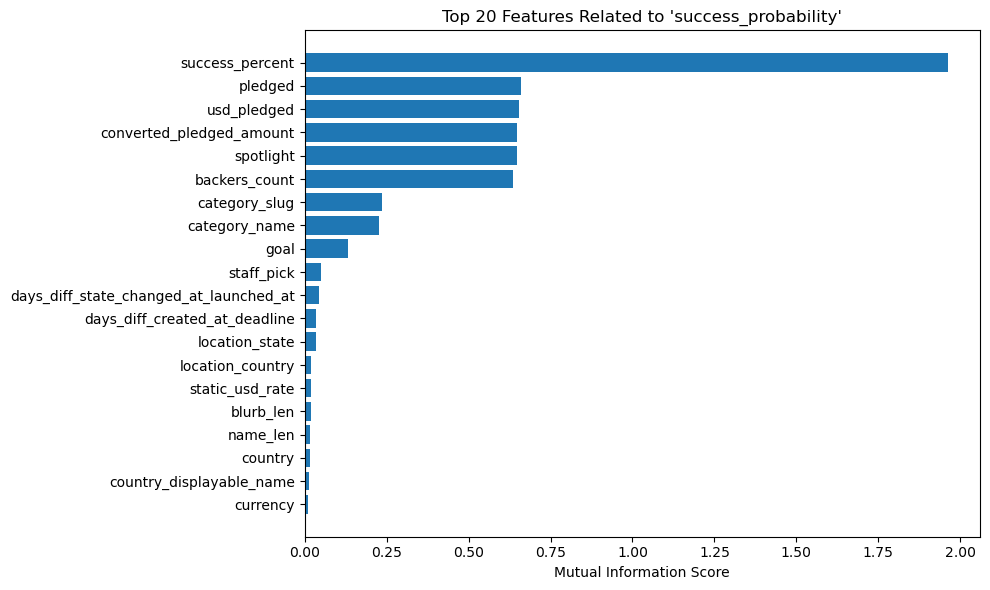

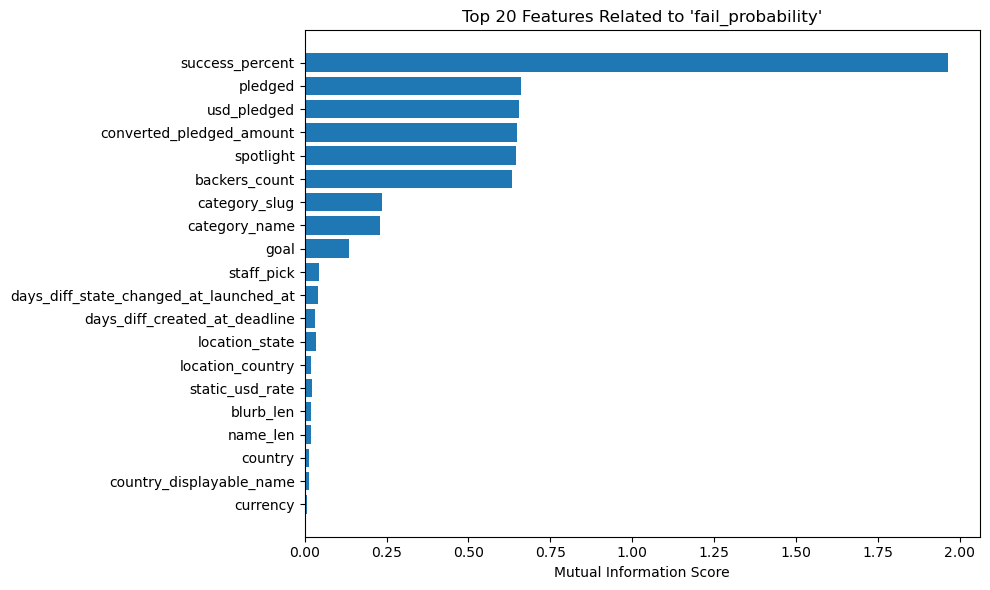

In [34]:
# แสดง top 20 สำหรับ success_probability
plt.figure(figsize=(10, 6))
plt.barh(mi_df["Feature"].head(20)[::-1], mi_df["MI_Success"].head(20)[::-1])
plt.xlabel("Mutual Information Score")
plt.title("Top 20 Features Related to 'success_probability'")
plt.tight_layout()
plt.show()

# แสดง top 20 สำหรับ fail_probability
plt.figure(figsize=(10, 6))
plt.barh(mi_df["Feature"].head(20)[::-1], mi_df["MI_Fail"].head(20)[::-1])
plt.xlabel("Mutual Information Score")
plt.title("Top 20 Features Related to 'fail_probability'")
plt.tight_layout()
plt.show()

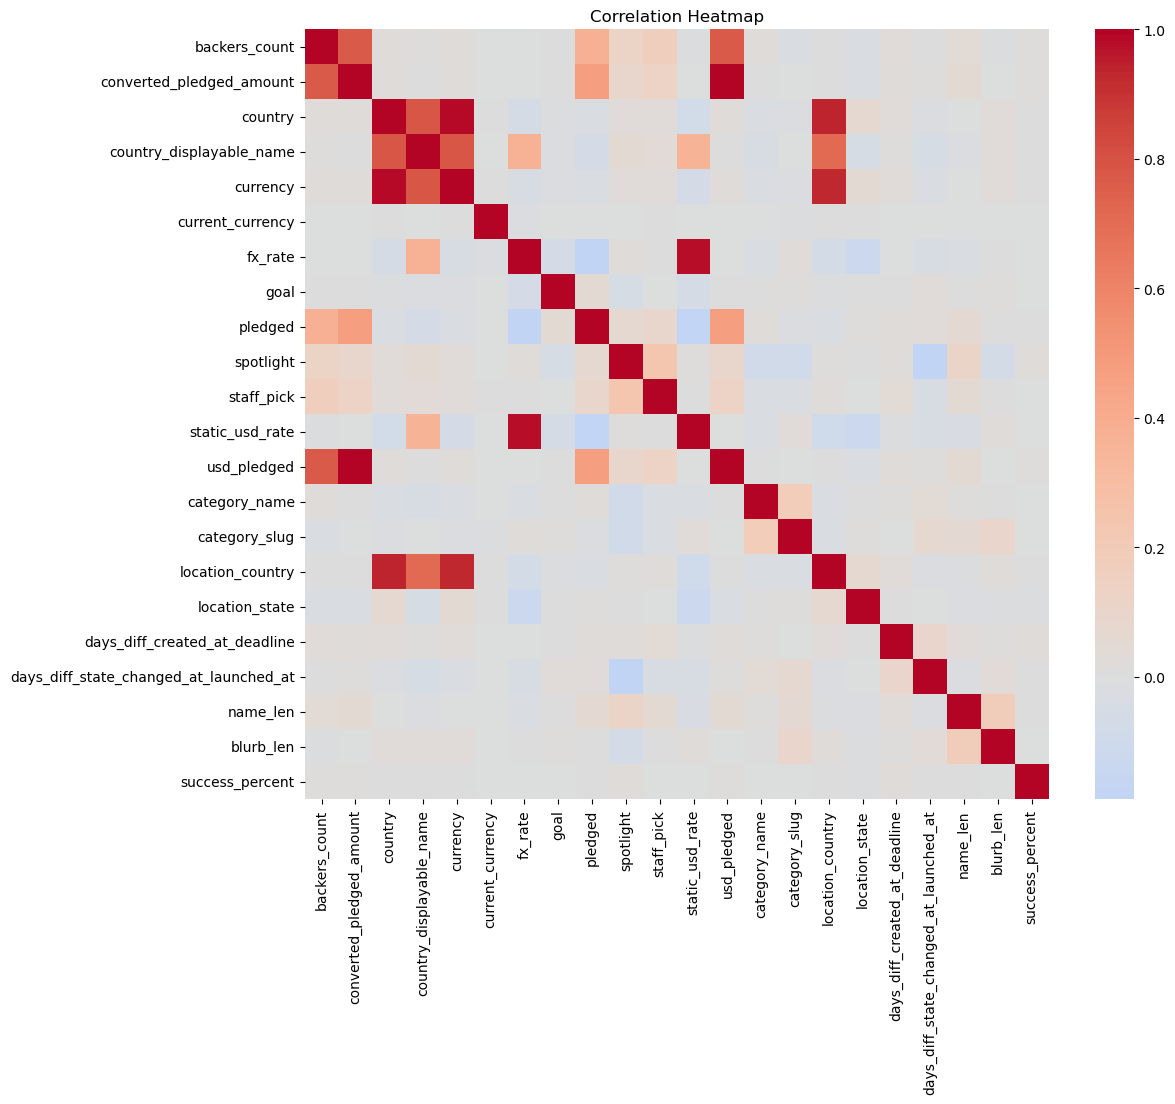

In [35]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()